<a href="https://colab.research.google.com/github/marcelodeoribeiro/MVP_Machine_Learning_Analytics/blob/main/MVP_Sprint_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - SPRINT II - MACHINE LEARNING & ANALYTICS

##PARTE 1 - MACHINE LEARNING

**TÍTULO: PREDIÇÃO DE DEPÓSITOS A PRAZO**

**OBJETIVO:** O propósito deste classificador é prever se um cliente optará por fazer um depósito a prazo. Este é um tipo de investimento bancário onde o cliente concorda em deixar uma quantia de dinheiro depositada em uma instituição financeira por um período de tempo pré-estabelecido. Em troca, o cliente recebe juros sobre o valor depositado. Portanto, o classificador tem como objetivo auxiliar na previsão do comportamento de investimento dos clientes.  

**INFORMAÇÕES SOBRE OS DADOS:** Os dados em questão são provenientes de campanhas de marketing direto realizadas por uma instituição bancária em Portugal. Essas campanhas foram conduzidas principalmente por meio de chamadas telefônicas. Frequentemente, era necessário entrar em contato com o mesmo cliente várias vezes para determinar se ele iria ou não se inscrever no produto oferecido, que é uma conta de depósito a prazo. Portanto, esses dados representam uma visão detalhada dessas campanhas de marketing, incluindo a eficácia das mesmas e quaisquer tendências ou padrões notáveis observados.  

**CRÉDITOS:** O dataset foi baixado do repositório UCI sob o título "Bank Marketing"  cujos criadores foram S. Moro, P. Rita e P. Cortez.  

Para maiores informações clique no link:
https://archive.ics.uci.edu/ml/datasets/bank+marketing#

**DESCRIÇÃO DOS DADOS:**  

* Número de exemplos: 45.211
* Número de atributos: 16 + o atributo de saída
* Detalhes dos atributos:

  * Informações bancárias do cliente:  
    1 - age (numérico)  
    2 - job: tipo de emprego (categórico: "admin.", "unknown", ,"unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")  
    3 - marital: situação civil (categórico: married","divorced","single"; note: "divorced" means divorced or widowed)  
    4 - education (categórico: "unknown","secondary","primary","tertiary")  
    5 - default: tem crédito inadimplente? (binário: "yes","no")  
    6 - balance: saldo médio anual em euros (numérico)  
    7 - housing: tem empréstimo imobiliário? (binário: "yes","no")  
    8 - loan: tem empréstimo pessoal? (binário: "yes","no")    

  * Relacionados com o último contato da atual campanha de marketing:  
    9 - contact: tipo de contato (categórico: "unknown","telephone","cellular")  
    10 - day: dia do último contato do mês (numérico)  
    11 - month: mês do último contato do ano (categórico: "jan", "feb", "mar", ..., "nov", "dec")  
    12 - duration: duração do último contato em segundos (numérico)  

  * Outros atributos:  
    13 - campaign: Número de contatos realizados durante esta campanha para este cliente (numérico, inclui o último contato)  
    14 - pdays: Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (numérico, -1 significa que o cliente não foi previamente contatado)  
    15 - previus: Número de contatos realizados antes desta campanha para este cliente (numérico)  
    16 - poutcome: Resultado da campanha de marketing anterior (categórico: "unknown","other","failure","success")  
  
  * Atributo de saída:  
    17 - y: O cliente assinou um depósito a prazo? (binário: "yes","no")  

**ESTRUTURA:** O notebook está divido da seguinte forma:  

  1. Importação das bibliotecas
  2. Carga do dataset
  3. Funções úteis
  4. Separar os atributos numéricos e categóricos
  5. Visualização dos dados numéricos
  6. Feature selection
  7. Separação em conjunto de treino e teste com holdout
  8. Pré-processamento dos dados
  9. Comparação e avaliação dos modelos
  10. Escolha do modelo e otimização dos hiperparâmetros
  11. Finalização do modelo



###1. Fazer as importações necessárias  para executar o notebook

In [14]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import gdown
import os
import pickle

# Imports necessários
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

###2. Carga do dataset

In [15]:
# o arquivo está compartilhado como público no google drive
file_url = 'https://drive.google.com/uc?export=download&id=1esf0VDJTLe7bjWnPVWfEy_cqu0QjDzSJ'

# download do arquivo
output = 'bank-full.csv'
gdown.download(file_url, output, quiet=False)

# Lê o arquivo
dataset = pd.read_csv(output, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

Downloading...
From: https://drive.google.com/uc?export=download&id=1esf0VDJTLe7bjWnPVWfEy_cqu0QjDzSJ
To: /content/bank-full.csv
100%|██████████| 4.61M/4.61M [00:00<00:00, 20.4MB/s]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###3. Funções úteis

In [16]:
# Zip de duas listas de str
# preenchendo a lista menor com string vazias
def zip_list(lst1, lst2):
    if len(lst1) < len(lst2):
        smaller_lst = lst1
        larger_lst = lst2
    else:
        smaller_lst = lst2
        larger_lst = lst1
    smaller_lst += [""] * (len(larger_lst) - len(smaller_lst))
    return zip(lst1, lst2)


# imprime as listas de atributos numéricos e categóricos
def print_feat(lst_cat, lst_num):
    print(f'{"Categórico:":12} {"Numérico:":12}')
    for cat, num in zip_list(lst_cat.copy(), lst_num.copy()):
        print(f'{cat:12} {num:12}')


# imprime os atributos de um dicionário
def print_result(dict_res):
    print(f'\nAtributos melhores pontuados:')
    for i, (name, val) in enumerate(dict_res.items()):
        print(f'{i+1:2}) {name:12}: {val:.04f}')


def select_best_features(X_in, y_in, n_best, score_func):
    """
    Função para selecionar os melhores atributos usando SelectKBest

    Parâmetros:
    X_in : DataFrame - atributos de entrada
    y_in : Series - variável alvo
    n_best : int - número de melhores atributos para selecionar
    score_func : callable - função de pontuação para ser usada (ex: f_classif, chi2)

    Retorna:
    best_feat_imp : dict - dicionário com a importância das n_best características
    """

    # Verifica se os parâmetros de entrada são válidos
    assert isinstance(n_best, int), "n_best deve ser um inteiro"
    assert callable(score_func), "score_func deve ser uma função válida"

    # Inicializa SelectKBest com a função de pontuação e o número de melhores atributos
    best_var = SelectKBest(score_func=score_func, k=n_best)

    # Ajusta o modelo aos dados e seleciona os melhores atributos
    fit = best_var.fit(X_in, y_in)

    # Transforma X_in para incluir apenas os atributos selecionados
    features = fit.transform(X_in)

    # Exibe o número original e reduzido de atributos
    print(f'\nNúmero original de atributos: {X_in.shape[1]}')
    print(f'Número reduzido de atributos: {features.shape[1]}')

    # Cria um dicionário com as pontuações para cada atributo
    feat_imp = {name: val for val, name in zip(fit.scores_, X_in.columns)}

    # Ordena o dicionário por pontuação
    feat_imp = dict(sorted(feat_imp.items(), key=lambda x: x[1], reverse=True))

    # Seleciona somente as n_best características
    best_feat_imp = {k: feat_imp[k] for k in list(feat_imp.keys())[:n_best]}

    # Imprime as pontuações das n_best atributos
    print_result(best_feat_imp)

    return best_feat_imp


###4. Separar os atributos numéricos e categóricos

Ao proceder à distinção entre atributos numéricos e categóricos, acredito que é fundamental considerar "day" como uma variável categórica, apesar de sua natureza numérica aparente. Essa perspectiva é motivada pela compreensão de que, similarmente ao mês, o dia exerce uma função categórica ao influenciar as tendências decisórias individuais em relação a aspectos financeiros. Dessa forma, ao categorizar "day", podemos obter uma análise mais refinada e precisa dos impactos temporais nas decisões financeiras.

In [17]:
# target
col_y = ['y']

# Lista de colunas numéricas
col_num = ['age',	'balance', 'duration', 'campaign', 'pdays', 'previous']

# Lista de colunas categóricas
col_cat = [col for col in dataset.columns if col not in [*col_num, *col_y]]

In [18]:
# imprimir os atributos separados
print_feat(col_cat, col_num)

Categórico:  Numérico:   
job          age         
marital      balance     
education    duration    
default      campaign    
housing      pdays       
loan         previous    
contact                  
day                      
month                    
poutcome                 


###5 - Visualização dos dados numéricos

In [19]:
dataset[col_num].describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


Os dados acima são estatísticas descritivas das seis variáveis numéricas. Aqui estão algumas observações:

- Age: A idade média dos indivíduos é de aproximadamente 41 anos, com um desvio padrão de cerca de 10.6 anos, indicando uma dispersão moderada em torno da média. A idade mínima é de 18 anos e a máxima de 95 anos, abrangendo uma faixa etária bastante ampla.

- Balance: Esta variável possui um alto desvio padrão em relação à média, sugerindo uma grande dispersão nos dados. A presença de um valor mínimo negativo (-8019) pode indicar dívidas ou um saldo negativo nas contas dos clientes. Além disso, a grande diferença entre o 3º quartil (1428) e o valor máximo (102127) sugere a presença de outliers, ou seja, indivíduos com saldo muito acima da média.

- Duration: A duração média é de aproximadamente 258, com um desvio padrão também alto, indicando que as durações variam bastante. O valor máximo é muito maior que o terceiro quartil, sugerindo que alguns chamadas foram muito mais longas que a maioria.

- Campaign: Em média, os indivíduos foram contatados cerca de 2.76 vezes. A maioria dos indivíduos foi contatada no máximo 3 vezes (3º quartil), mas alguns foram contatados até 63 vezes, o que pode ser considerado outliers.

- Pdays: A grande maioria dos valores está concentrada em -1 (mediana e 3º quartil), sugerindo que a maioria dos clientes não foi contatada antes da campanha. No entanto, há clientes que foram contatados há até 871 dias (quase 2,4 anos) atrás.

- Previous: A média é 0.58, e o 3º quartil é 0, o que significa que a maioria dos indivíduos não teve contatos prévios. No entanto, o valor máximo é 275, sugerindo que alguns indivíduos tiveram muitos contatos prévios.

Em geral, é notável a presença de outliers em várias das variáveis, como indicado pelos valores máximos distantes dos respectivos 3º quartis. Além disso, para "pdays" e "previous", a grande maioria dos indivíduos parece ter valores de -1 e 0, respectivamente, o que pode tornar essas variáveis menos úteis para prever o resultado de interesse.

In [20]:
dataset['previous'].value_counts()[:10]

0    36954
1     2772
2     2106
3     1142
4      714
5      459
6      277
7      205
8      129
9       92
Name: previous, dtype: int64

In [21]:
dataset['pdays'].value_counts()[:10]

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
Name: pdays, dtype: int64

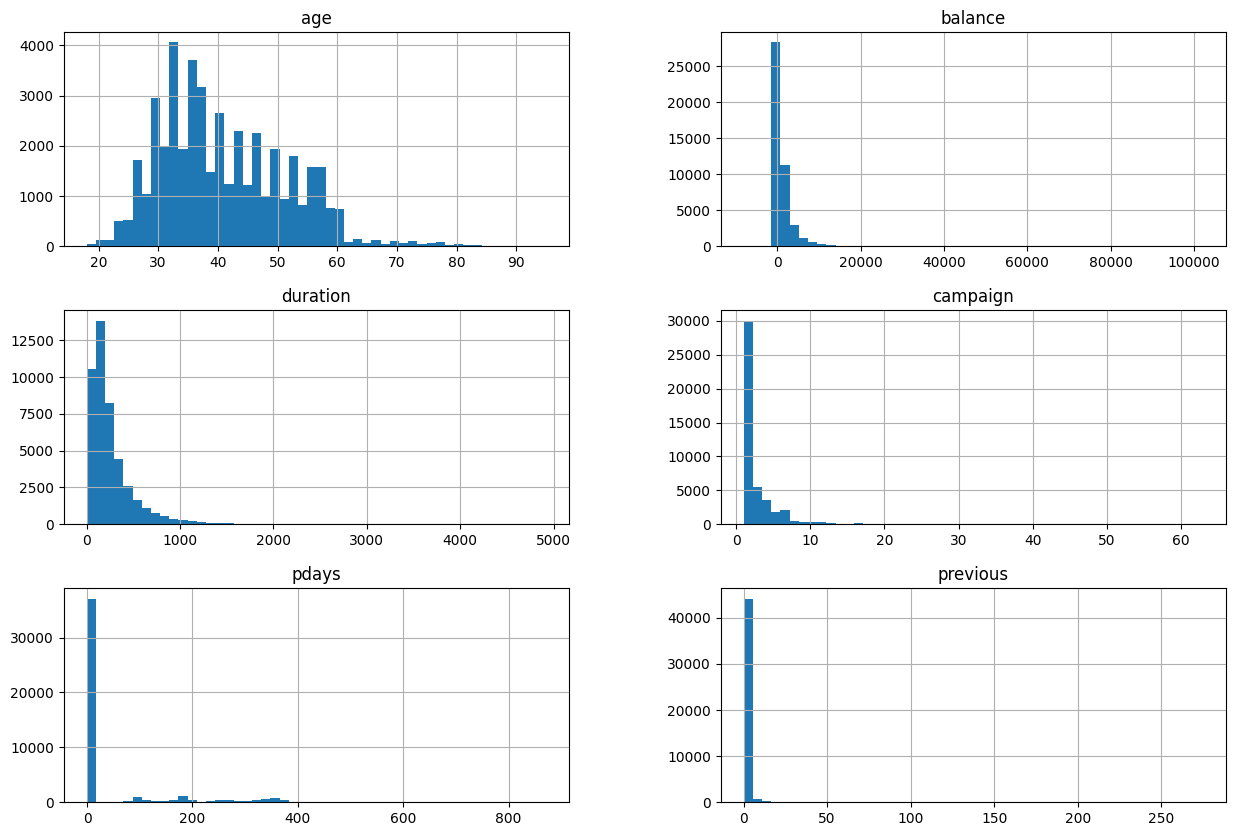

In [22]:
dataset[col_num].hist(bins=50, figsize=(15,10))
plt.show()

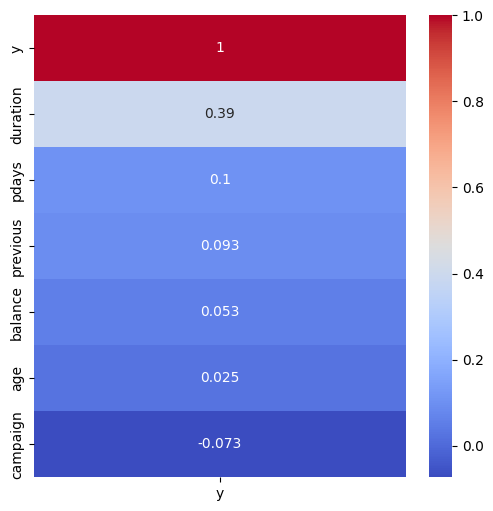

In [23]:
# separando os atributos numéricos com o target 'y'
df_temp = dataset[[*col_num, *col_y]].copy()

# convertendo a variável alvo para numérica
df_temp['y'] = df_temp['y'].map({'no': 0, 'yes': 1})

# visualizar a matriz de correlação
plt.figure(figsize=(6,6))
sns.heatmap(df_temp.corr()[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.show()

Baseado na matriz de correlação, podemos inferir que a duração da última chamada com o cliente ('duration') tem a correlação mais forte com a variável alvo 'y'. Isso pode sugerir que quanto mais longa a chamada, maior a probabilidade de o cliente se inscrever no produto bancário (assumindo que 'yes' significa inscrição). É importante notar que, embora a correlação seja positiva, ela não é extremamente alta, o que indica que outras variáveis não consideradas na matriz de correlação também podem ter um papel importante na previsão de 'y'.

As outras variáveis têm correlações muito menores com 'y', o que sugere que elas podem não ser tão informativas para prever a variável alvo por si só. No entanto, a correlação por si só não dá a imagem completa, especialmente quando se lida com dados categóricos e a interação entre as variáveis.

Embora a matriz de correlação tenha fornecido uma visão útil da relação entre variáveis numéricas e a variável alvo, outras técnicas podem ser mais adequadas quando se trata de dados categóricos e a interação entre variáveis. O teste de Chi-Square, por exemplo, é um método poderoso para determinar se há uma associação significativa entre duas variáveis categóricas. Este teste poderia fornecer insights sobre a relevância de variáveis categóricas no conjunto de dados para a previsão do resultado.

Além disso, a Análise de Variância (ANOVA) pode ser empregada para investigar se há diferenças significativas nas médias de uma variável numérica entre os grupos definidos por uma variável categórica. Em outras palavras, ANOVA pode ajudar a entender se a variável categórica tem um efeito significativo na variável numérica.

Portanto, para uma compreensão mais completa e um modelo de previsão mais robusto, seria apropriado considerar essas técnicas além da análise de correlação, especialmente ao lidar com dados categóricos.

###6. Feature Selection

Na fase de seleção de características, optei por técnicas específicas para lidar com atributos numéricos e categóricos. Para as variáveis contínuas, a Análise de Variância (ANOVA) foi minha escolha, já que é eficaz para identificar diferenças significativas entre as médias de grupos, fornecendo uma base sólida para a seleção de características numéricas. Por outro lado, empreguei o teste de Chi-Square para as variáveis categóricas, avaliando a independência entre essas variáveis e nosso alvo, permitindo a identificação de recursos que possuem uma correlação maior com nossa variável de saída.

Para minimizar o ruído e o potencial de overfitting, apliquei uma estratégia que mantém apenas as características mais importantes - selecionando os 75% superiores dos atributos disponíveis. Isso proporciona um equilíbrio, garantindo que nosso modelo seja alimentado com informações de qualidade, ao mesmo tempo que evita ajustar excessivamente aos dados de treinamento, o que poderia comprometer a capacidade do modelo de generalizar para dados não vistos.

Para chegar a essa proporção, escolhi 4 atributos numéricos e 8 categóricos, representando um total de 12. Esta distribuição foi baseada na observação de que nosso conjunto de dados possui mais atributos categóricos relevantes (conforme indicado pelas pontuações do teste de Chi-Square) em comparação aos atributos numéricos, oferecendo assim um mix equilibrado de ambos os tipos de características para nosso modelo.

Separando os dados entre numéricos e categóricos.

In [24]:
# cópia dos atributos sem a coluna target
X = dataset.drop(columns=['y'], axis=1)

# atributos numéricos
X_num = X[col_num].copy()

# atributos categóricos
X_cat = X[col_cat].copy()

# target
y = dataset[col_y].copy()

# quantidade de atributos numéricos escolhidos
n_attr_num = 4

# quantidade de atributos categóricos escolhidos
n_attr_cat = 8

a) Aplicando ANOVA sobre atributos numéricos


In [25]:
feat_num = select_best_features(X_num, y, n_attr_num, f_classif)


Número original de atributos: 6
Número reduzido de atributos: 4

Atributos melhores pontuados:
 1) duration    : 8333.7611
 2) pdays       : 490.6966
 3) previous    : 396.4440
 4) campaign    : 243.3584


b) Aplicando Chi-Square sobre os atributos categóricos

In [26]:
# codificando os atributos categóricos
label_encoder = LabelEncoder()
X_cat_enc = X_cat.apply(label_encoder.fit_transform)

feat_cat = select_best_features(X_cat_enc, y, n_attr_cat, chi2)


Número original de atributos: 10
Número reduzido de atributos: 8

Atributos melhores pontuados:
 1) contact     : 1253.8141
 2) housing     : 388.9497
 3) job         : 182.4523
 4) loan        : 176.5161
 5) day         : 169.9525
 6) poutcome    : 104.6775
 7) education   : 90.6177
 8) month       : 44.3219


c) Lista com os atributos escolhidos

In [27]:
# lista de atributos categóricos escolhidos
col_cat_esc = list(feat_cat.keys())

# lista de atributos numéricos escolhidos
col_num_esc = list(feat_num.keys())

# atributos escolhidos
attr_escolhidos = [*col_num_esc, *col_cat_esc]
attr_escolhidos

['duration',
 'pdays',
 'previous',
 'campaign',
 'contact',
 'housing',
 'job',
 'loan',
 'day',
 'poutcome',
 'education',
 'month']

###7 - Separação em conjunto de treino e teste com holdout

In [28]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 42 # semente aleatória

# definição de X e y
X = dataset[attr_escolhidos].copy()
y = dataset['y'].copy()

# holdout com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y
)

# parâmetros e partiçoes da validação cruzada
scoring = 'roc_auc'
num_particoes = 10

# validação cruzada com estratificação
kfold = StratifiedKFold(
    n_splits=num_particoes, shuffle=True, random_state=seed,
)

A AUC-ROC é uma métrica de desempenho para problemas de classificação binária. Ela informa quão bom o modelo criou as classificações, variando o limiar de discriminação. ROC é uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Quanto maior a AUC, melhor o modelo está em prever 0s como 0s e 1s como 1s. Por exemplo, uma AUC de 1,0 significa que o modelo tem 100% de capacidade de distinguir as diferentes classes. Em outras palavras, é capaz de fazer uma separação perfeita entre a classe positiva e a classe negativa.

Vale destacar que a AUC-ROC é uma medida robusta à desbalanceamento de classes e funciona bem mesmo se houver um alto desequilíbrio entre a classe positiva e a classe negativa, que é o caso do problema estudado.

###8 - Pré-processamento dos dados

No processo de preparação de dados para o treinamento de modelos de aprendizado de máquina, decidi adotar duas técnicas de escalonamento diferentes para os atributos numéricos, com base em suas características de distribuição, e uma técnica de codificação para os atributos categóricos.

Primeiramente, construí um pipeline chamado 'num_norm_pipeline' que aplica a técnica de MinMaxScaler aos atributos numéricos. Essa técnica de escalonamento transforma os dados de modo que eles fiquem dentro de um intervalo específico, geralmente entre 0 e 1, mantendo sua distribuição original. Optei por usar MinMaxScaler para atributos numéricos que não apresentavam uma distribuição próxima à normal.

Em seguida, estabeleci outro pipeline, 'num_padr_pipeline', para processar atributos numéricos que seguem uma distribuição próxima à normal. Este pipeline aplica a técnica de StandardScaler, que padroniza os dados para terem uma média igual a 0 e um desvio padrão igual a 1. Esta técnica é adequada para dados com uma distribuição próxima à normal.

Para atributos categóricos, criei um terceiro pipeline, 'cat_pipeline', que aplica o OneHotEncoder. Este codificador transforma cada categoria única em um novo atributo binário, o que facilita o processo de aprendizado para muitos modelos de aprendizado de máquina.

Todos esses pipelines são então combinados em um único pipeline, chamado 'full_pipeline', usando a classe ColumnTransformer. Cada pipeline é aplicado a um conjunto específico de colunas, definido pelas listas 'col_num_norm', 'col_num_padr' e 'col_cat_esc'.

Por fim, com a variável alvo 'y_train', utilizo a técnica de codificação de labels, LabelEncoder, que transforma as categorias em números inteiros. Isso é feito para permitir que os modelos de aprendizado de máquina processem a variável alvo, uma vez que esses modelos geralmente requerem que a entrada seja numérica. Portanto, com a variável alvo 'y_train' transformada em 'y_train_transf', estou pronto para treinar o modelo.

- Define os atributos numéricos que vão ser transformados utilizando MinMaxScaler e StandardScaler

In [29]:
# atributos para normalizar
col_num_norm = ['pdays', 'previous']

# atributos para padronizar
col_num_padr = [col for col in col_num_esc if col not in col_num_norm]

print(f"{'Normalizar:':14} {'Padronizar:':18}")
for col1, col2 in zip(col_num_norm, col_num_padr):
    print(f'{col1:14} {col2:18}')

Normalizar:    Padronizar:       
pdays          duration          
previous       campaign          


In [30]:
# Cria um pipeline para pré-processar as variáveis numéricas com MinMaxScaler
num_norm_pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler())  # Aplica o MinMaxScaler para normalização
])


# Cria um pipeline para pré-processar as variáveis numéricas com StandardScaler
num_padr_pipeline = Pipeline([
    ('std_scaler', StandardScaler())  # Aplica o StandardScaler para padronização
])

# Cria um pipeline para pré-processar as variáveis categóricas
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse=False))  # Aplica o OneHotEncoder para codificar as variáveis categóricas
])

# Combina os pipelines para variáveis numéricas e categóricas em um único pipeline
full_pipeline = ColumnTransformer([
    ('num_norm', num_norm_pipeline, col_num_norm),
    ('num_padr', num_padr_pipeline, col_num_padr),
    ('cat', cat_pipeline, col_cat_esc)
])

# Inicializa um LabelEncoder
label_encoder = LabelEncoder()

# Usa o LabelEncoder para transformar a variável alvo y_train
y_train_transf = label_encoder.fit_transform(y_train)  # Codifica a variável alvo como uma variável numérica


###9 - Comparação e avaliação dos modelos

Uma parte crucial do processo de modelagem é a comparação e avaliação de diversos modelos de machine learning. Isso se deve ao fato de que diferentes modelos têm diferentes forças e fraquezas e podem se comportar de maneira distinta dependendo da natureza e da estrutura dos dados disponíveis. Ao avaliar vários modelos, posso ter uma visão mais holística de como diferentes algoritmos lidam com o problema em questão, permitindo-me selecionar o modelo que fornece a melhor performance ou o que melhor se adapta às necessidades específicas do projeto. Por exemplo, enquanto um modelo pode ter a maior precisão, outro pode ter um tempo de treinamento mais rápido ou ser mais interpretável. A comparação de modelos me permite equilibrar essas diferentes considerações e selecionar o melhor modelo para o contexto específico do problema que estou resolvendo.

 1) LR        : 0.9085 (0.0072)
 2) KNN       : 0.8407 (0.0129)
 3) CART      : 0.7071 (0.0120)
 4) NB        : 0.7959 (0.0158)
 5) SVM       : 0.9144 (0.0096)
 6) Bagging   : 0.9156 (0.0070)
 7) RF        : 0.9128 (0.0077)
 8) ET        : 0.8806 (0.0085)
 9) Ada       : 0.9124 (0.0067)
10) GB        : 0.9218 (0.0063)
11) Voting    : nan (nan)


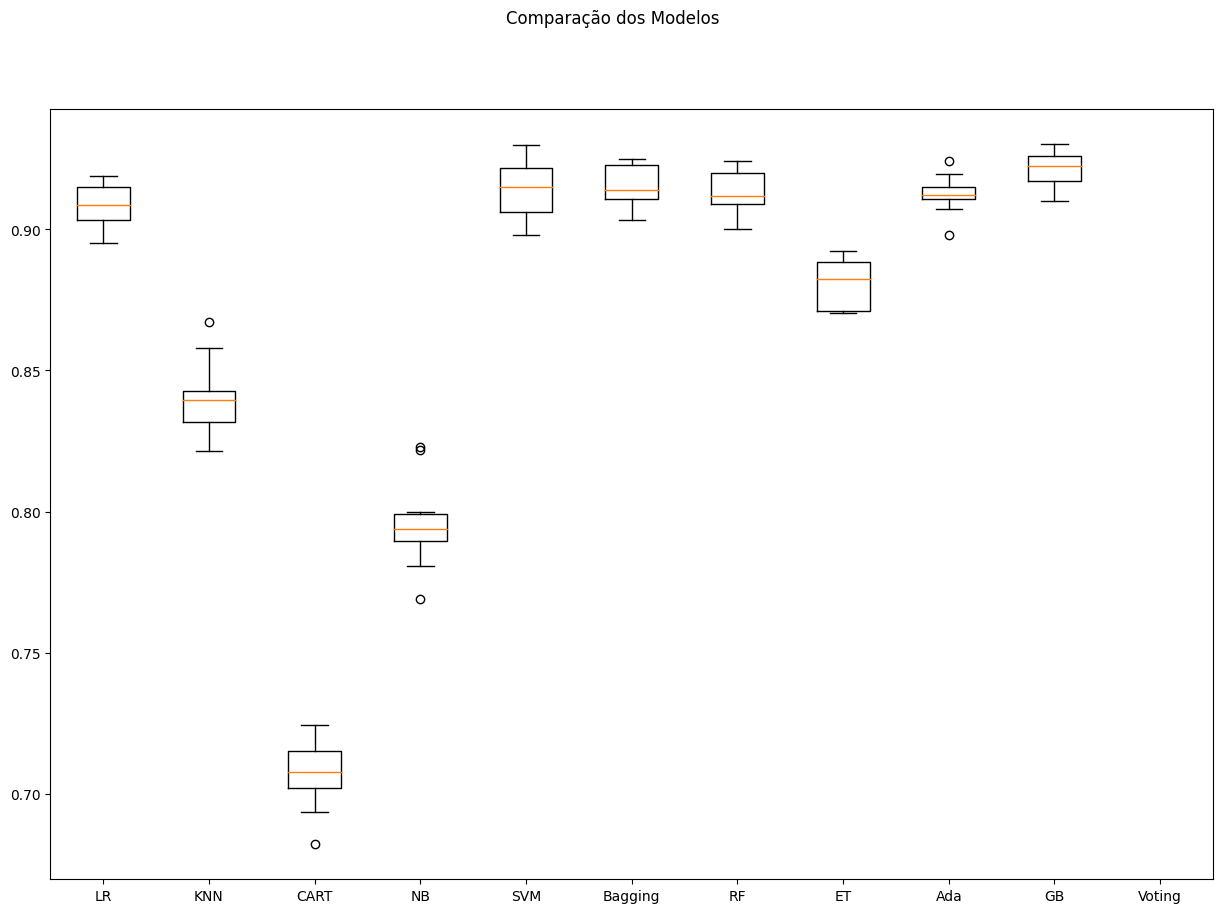

In [ ]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
pipelines = []

# Criando os modelos e adicionando-os na lista de modelos
pipelines.append(('LR', Pipeline(steps=[('preprocessor', full_pipeline), ('model', LogisticRegression(max_iter=200))])))
pipelines.append(('KNN', Pipeline(steps=[('preprocessor', full_pipeline), ('model', KNeighborsClassifier())])))
pipelines.append(('CART', Pipeline(steps=[('preprocessor', full_pipeline), ('model', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline(steps=[('preprocessor', full_pipeline), ('model', GaussianNB())])))
pipelines.append(('SVM', Pipeline(steps=[('preprocessor', full_pipeline), ('model', SVC())])))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = KNeighborsClassifier()
bases.append(('knn', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
pipelines.append(('Bagging', Pipeline(steps=[('preprocessor', full_pipeline), ('model', BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('RF', Pipeline(steps=[('preprocessor', full_pipeline), ('model', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('ET', Pipeline(steps=[('preprocessor', full_pipeline), ('model', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('Ada', Pipeline(steps=[('preprocessor', full_pipeline), ('model', AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('GB', Pipeline(steps=[('preprocessor', full_pipeline), ('model', GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('Voting', Pipeline(steps=[('preprocessor', full_pipeline), ('model', VotingClassifier(bases))])))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for i, (name, pipeline) in enumerate(pipelines, start=1):
    cv_results = cross_val_score(pipeline, X_train, y_train_transf, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = f'{i:2}) {name:10}: {cv_results.mean():.4f} ({cv_results.std():.4f})'
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###10 - Escolha do modelo e otimização dos hiperparâmetros

Com base nos resultados do teste de validação cruzada, decidi escolher o Gradient Boosting (GB) como o modelo mais adequado para este conjunto de dados. O GB obteve a pontuação média mais alta (0.9218) entre todos os modelos testados, indicando que ele tem o melhor desempenho geral na previsão correta das classes alvo. Além disso, a variação do desempenho do GB, conforme indicado pelo desvio padrão da pontuação (0.0063), também é razoavelmente baixa, sugerindo que o modelo é estável e confiável. O GB é um modelo de aprendizado de máquina robusto que constrói iterativamente árvores de decisão de maneira a otimizar a redução de erros. Portanto, é capaz de capturar complexidades nos dados que podem ser perdidas por modelos mais simples. Assim, acredito que a escolha do Gradient Boosting como o modelo para este conjunto de dados é a mais adequada considerando sua performance superior nos testes realizados.

- Otimização dos hiperparâmetros utilizando GradientBoostingClassifier  

Em face das restrições computacionais, optei por utilizar o RandomizedSearchCV em detrimento do GridSearchCV. A motivação por trás dessa escolha reside na eficiência inerente do RandomizedSearchCV que, em vez de exaustivamente explorar todas as combinações possíveis de parâmetros (como faz o GridSearchCV), seleciona aleatoriamente um subconjunto dessas combinações, resultando em um tempo de execução significativamente menor sem comprometer de forma substancial a qualidade da otimização dos hiperparâmetros.

Adicionalmente, reduzi o número de partições de validação cruzada de 10 para 5. Este ajuste auxilia na economia de recursos computacionais, diminuindo a quantidade de subsets gerados para a validação cruzada, e ainda mantém um nível satisfatório de robustez nas estimativas de erro de generalização do modelo. É importante salientar que a escolha de 'k' em um K-fold cross-validation é sempre uma compensação entre a precisão da estimativa de erro (que aumenta com 'k') e a eficiência computacional (que diminui com 'k').

In [ ]:
# Tuning GB

# Definindo uma semente global para este bloco
np.random.seed(seed)

# Definindo o modelo
gb_pipeline = Pipeline(steps=[('preprocessor', full_pipeline), ('model', GradientBoostingClassifier())])

# Criando a grade de hiperparâmetros
param_distributions = {
    'model__n_estimators': [150, 250, 350],
    'model__learning_rate': [0.01, 0.1, 1.0],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_features': ['sqrt', 'log2'],
    'model__subsample': [1.0]
}

# validação cruzada com estratificação
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=seed,
)

# Preparando e executando o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_pipeline, param_distributions=param_distributions, n_iter=200, verbose=3, cv=kfold, scoring=scoring, n_jobs=-1)
random_search.fit(X_train, y_train_transf)

# Printando os melhores resultados
print(f'Melhor: {random_search.best_score_:.4f} usando {random_search.best_params_}')


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Melhor: 0.9333 usando {'model__subsample': 1.0, 'model__n_estimators': 350, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__learning_rate': 0.1}


###11 - Finalização do modelo

No estágio de finalização do meu modelo Gradient Boosting, optei por utilizar todo o conjunto de dados de treinamento, incluindo os parâmetros otimizados previamente identificados pelo processo de ajuste dos hiperparâmetros. No entanto, o desempenho do modelo no conjunto de teste não atingiu o nível de desempenho observado durante o processo de otimização. Acredito que isso possa ser atribuído principalmente a duas razões potenciais.

Em primeiro lugar, o modelo pode ter sofrido de overfitting. Isso acontece quando o modelo aprende os dados de treinamento tão bem que acaba capturando também o ruído aleatório presente nesses dados. Como resultado, o modelo pode não generalizar bem para novos dados, como o conjunto de teste, levando a uma queda no desempenho.

Em segundo lugar, pode haver a presença de outliers ou valores extremos nos atributos que não foram devidamente tratados. Esses valores ruidosos podem ter um impacto significativo no desempenho do modelo, uma vez que podem levar o modelo a fazer previsões imprecisas. Nesse sentido, um tratamento adequado dos outliers pode melhorar o desempenho geral do modelo.

Em resumo, mesmo que os hiperparâmetros do modelo tenham sido otimizados, a presença de overfitting ou a falta de tratamento adequado de outliers pode ter resultado em um desempenho inferior do modelo quando aplicado ao conjunto de teste. Portanto, medidas futuras de melhoria do modelo podem incluir a implementação de técnicas para mitigar o overfitting, como a regularização, e aprimorar o pré-processamento dos dados para lidar de forma mais eficaz com os outliers.  

Optei por realizar um ajuste fino no hiperparâmetro 'learning rate'. O conjunto de possíveis valores que eu havia estabelecido para a otimização dos hiperparâmetros apresentava uma ampla gama, o que poderia dificultar a busca pelo valor ótimo. Por essa razão, decidi focar em uma região mais restrita em torno de 0.1. Depois de testar manualmente uma série de valores nesse intervalo, descobri que o modelo apresentava um desempenho superior com 'learning rate' ajustado para 0.3.

In [31]:
# Avaliação do modelo com o conjunto de testes

# Definindo uma semente global para este bloco
np.random.seed(seed)

# Preparação do modelo
gb_pipeline = Pipeline(steps=[
    ('preprocessor', full_pipeline),
    ('model', GradientBoostingClassifier(
        subsample=1.0, n_estimators=350, min_samples_split=2, min_samples_leaf=1,
        max_features='sqrt', max_depth=5, learning_rate=0.3
    ))
])
gb_pipeline.fit(X_train, y_train_transf)

# Estimativa da auc-roc no conjunto de teste
y_test_transf = label_encoder.transform(y_test)
predictions = gb_pipeline.predict(X_test)
print(f'AUC-ROC: {roc_auc_score(y_test_transf, predictions):.4f}')

AUC-ROC: 0.7213


- Salvando o modelo para uso futuro

In [32]:
# Verificar se a pasta 'modelo' existe, senão, criá-la
if not os.path.exists('modelo'):
    os.makedirs('modelo')

# Salvar o modelo na pasta 'modelo'
with open('modelo/gb_pipeline_model.pkl', 'wb') as file:
    pickle.dump(gb_pipeline, file)

# Salvar o LabelEncoder na pasta 'modelo'
with open('modelo/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

- Para carregar os objetos novamente, usar o seguinte código:

In [33]:
# Carregar o modelo da pasta 'modelo'
with open('modelo/gb_pipeline_model.pkl', 'rb') as file:
    gb_pipeline_loaded = pickle.load(file)

# Carregar o LabelEncoder da pasta 'modelo'
with open('modelo/label_encoder.pkl', 'rb') as file:
    label_encoder_loaded = pickle.load(file)


- Usando o modelo lido do arquivo nos dados de teste

In [35]:
# Estimativa da auc-roc no conjunto de teste
y_test_transf = label_encoder_loaded.transform(y_test)
predictions = gb_pipeline_loaded.predict(X_test)
print(f'AUC-ROC: {roc_auc_score(y_test_transf, predictions):.4f}')

AUC-ROC: 0.7213


---

##PARTE 2 - DEEP LEARNING  

  
  **TÍTULO:  Aplicação de Visão Computacional para a Identificação de Regiões de Interesse em Imagens de Documentos**  

  **OBJETIVO:** O objetivo deste trabalho é desenvolver e treinar um modelo de aprendizado profundo, especificamente utilizando a biblioteca Keras, para identificar e localizar uma região específica em imagens de documentos. O modelo é treinado para atribuir uma pontuação de 0.0 a 1.0 a pequenos retângulos extraídos da imagem do documento, com a pontuação refletindo o grau de sobreposição com a região de interesse original. O objetivo final é que o modelo seja capaz de, em tempo de execução, receber uma imagem de um documento, identificar a região com a maior pontuação (mais próxima de 1.0), e assim determinar a localização e a orientação correta do documento na imagem.  

  **INFORMAÇÕES SOBRE OS DADOS:** O estudo em questão se concentra na análise de certidões de óbito. No entanto, para garantir a privacidade e a segurança das informações pessoais, as imagens completas desses documentos não são disponibilizadas. Em vez disso, o treinamento do modelo é realizado apenas com base em imagens de regiões específicas desses documentos, delimitadas por retângulos. Essas regiões foram cuidadosamente selecionadas para não incluir quaisquer dados pessoais. Elas contêm apenas símbolos e texto padrão que identificam o documento como uma certidão de óbito, garantindo assim a proteção das informações pessoais enquanto se realiza a análise necessária.  

  **DESCRIÇÃO DOS DADOS:** Neste estudo, analisamos 592 arquivos pickle (.pkl), cada um representando uma certidão de óbito. As certidões têm origens diversas, como digitalizações, fotografias e capturas de tela de celulares, e estão em formatos coloridos e em tons de cinza. As imagens nas quais as certidões estão inseridas seguem um padrão de 3508 x 2478 pixels (altura x largura), no entanto, as certidões não estão centralizadas e suas dimensões em pixels variam.

Cada arquivo contém partes das imagens que se concentram em uma área específica, onde um brasão e um texto estão presentes. Este elemento, apesar de algumas variações, é comum a todas as certidões. Essas subimagens foram redimensionadas para 20% do tamanho original, resultando em dimensões fixas de 66 x 166 pixels (altura x largura). Além disso, elas foram processadas para a remoção de ruídos e convertidas em tons de cinza.

Imagens de fundo branco, com as mesmas dimensões, foram criadas e representam 10% do total. Cada arquivo contém 185 desses pequenos retângulos de imagem, cada um com uma pontuação que varia de 0.0 a 1.0. A pontuação máxima é atribuída ao retângulo que cobre perfeitamente o brasão e o texto, enquanto as imagens em branco recebem a pontuação mínima.

No total, o conjunto de dados é composto por 109.520 imagens (592 arquivos x 185 imagens por arquivo), cada uma com sua respectiva pontuação.  

**ESTRUTURA:** O notebook está divido da seguinte forma:  

  1. Importação das bibliotecas
  2. Montagem da pasta com os dados
  3. Funções úteis e definições globais
  4. Visualizar algumas imagens
  5. Gerador de dados
  6. Separação em conjunto de treino, validação e teste
  7. Configuração do modelo de deep learning
  8. Treinamento do modelo de deep learning
  9. Execução do melhor modelo no subconjunto de teste

###1 - Fazer as importações necessárias para executar o notebook

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import gdown
import zipfile
import pickle
import os
import cv2
from tqdm import tqdm
import re
import sys
import datetime

import pandas as pd
import numpy as np

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

###2 - Montagem da pasta com os dados

In [2]:
# o arquivo está compartilhado como público no google drive
file_url = 'https://drive.google.com/uc?export=download&id=12dUHn00DkcPoH2J479vhGYxC6i-bdbrs'

# download do arquivo
output = 'data_img_roi.zip'
gdown.download(file_url, output, quiet=False)

# não é necessário extrair para uma pasta pois este zip já tem a pasta
with zipfile.ZipFile(output,'r') as zip_ref:
    zip_ref.extractall()


Downloading...
From: https://drive.google.com/uc?export=download&id=12dUHn00DkcPoH2J479vhGYxC6i-bdbrs
To: /content/data_img_roi.zip
100%|██████████| 72.6M/72.6M [00:02<00:00, 35.7MB/s]


###3 - Funções úteis e definições globais

####a) Definições sobre as imagens

In [3]:
# escala para redimencionamento da imagem
scale = 1.0

# dimensões originais das imagens
WIDTH_DEFAULT = 166
HEIGHT_DEFAULT = 66

# dimensões reescalonadas
W = int(WIDTH_DEFAULT * scale)
H = int(HEIGHT_DEFAULT * scale)

# profundidade das imagens com relação a cores
dim = 1

####b) Definições sobre os arquivos que contém as imagens

In [4]:
# lista todos arquivos pkl disponíveis na pasta
data_path = 'data_img_roi'
all_files = [filename for filename in os.listdir(data_path) if filename.endswith('.pkl')]

####c) Funções úteis

- Transformação da imagem

In [5]:
def transform_normalize_imgval(dado):
    """
    Reescalona a imagem e normaliza os pixels
    dado: dict -> contem a imagem e o target
    Retorna a imagem e o target
    """
    # redimensiona a imagem
    img = cv2.resize(dado['imagem'], dsize=(W, H))

    # Normalização das imagens
    img = img / 255.0

    # retorna a imagem e o target
    return img, dado['target']

- Plota o resultado do treinamento

In [6]:
# plota o resultado do treinamento
def plot_result(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

- Salva a lista de ids de treino para utilização em execução futura:  

Cada arquivo .pkl é identificado por um ID único incorporado em seu nome. Durante a fase de teste, que ocorre em um ambiente de execução, utilizamos a imagem completa fornecida no banco de dados. No entanto, para garantir a integridade do teste, os IDs que foram utilizados durante a fase de treinamento são excluídos. Isso significa que as imagens associadas a esses IDs não são incluídas no conjunto de teste em ambiente de execução, o que não é o caso deste notebook.

In [7]:
# salva lista de ids usados no treino para uso em um teste futuro
def save_data(lst_ids):
    filename = "ids_treino.pkl"
    try:
        with open(filename, "wb") as file:
            pickle.dump(lst_ids, file)
        print('Lista de IDs de treino salva.')
    except Exception as erro:
        print(f"Falha ao salvar informação.\nErro:{erro}")

###4 - Visualizar algumas imagens


Arquivo: imgret_2108879749.pkl - Número total de imagens: 185


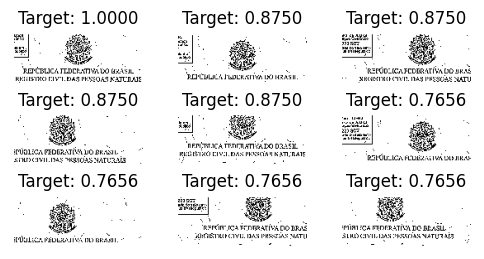


Arquivo: imgret_5819830768.pkl - Número total de imagens: 185


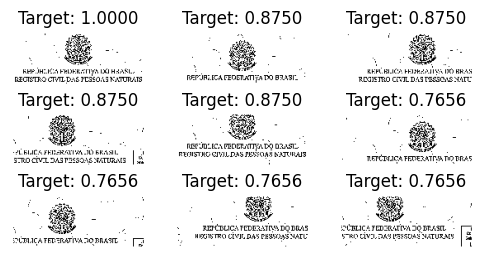


Arquivo: imgret_19219407787.pkl - Número total de imagens: 185


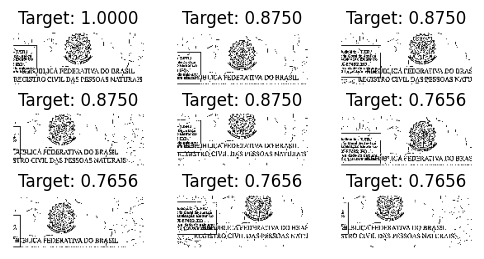

In [8]:
# separar os primeiros arquivos
head_files = all_files[:3]

# número de linhas
num_rows = 3

# número de colunas
num_cols = 3

# dimensões em polegadas para cada imagem
w_pol = 2
h_pol = 1

# número de imagens para plotagem por arquivo
num_imgs = num_rows * num_cols

# loop que percorre os arquivos separados
for filename in head_files:
    # abre cada arquivo para leitura
    with open(os.path.join(data_path, filename), 'rb') as file:
        # carrega uma lista com os dicionários
        imgvals = pickle.load(file)

        print(f'\nArquivo: {filename} - Número total de imagens: {len(imgvals)}')

        # ordena a lista decrescente do maior target 1.0 para o menor 0.0
        imgvals = sorted(imgvals, key = lambda x: x['target'], reverse=True)

        fig = plt.gcf()
        fig.set_size_inches(w_pol*num_cols, h_pol*num_rows)

        for i in range(num_imgs):
            subplot = plt.subplot(num_rows, num_cols, i+1)
            subplot.axis('off')

            plt.imshow(imgvals[i]['imagem'], cmap='gray')
            plt.title(f'Target: {imgvals[i]["target"]:.4f}')

        plt.show()



###5 - Gerador de dados

A utilização de um gerador de dados, como o definido na função data_generator, é uma prática comum e eficiente em aprendizado de máquina e deep learning por várias razões:

a) Eficiência de memória: Em muitos casos, o conjunto de dados é muito grande para ser carregado inteiramente na memória. Usando um gerador, eu posso carregar e processar os dados em lotes, o que é muito mais eficiente em termos de memória.

b) Treinamento em lotes: O gerador permite o treinamento em lotes, o que é uma prática padrão em aprendizado de máquina. Isso não apenas torna o treinamento mais eficiente, mas também pode melhorar a qualidade do modelo, pois o treinamento em lotes ajuda a evitar o overfitting.

c) Flexibilidade: O gerador é flexível e pode ser adaptado para lidar com diferentes formatos de dados e diferentes esquemas de pré-processamento. No caso deste gerador específico, ele lida com arquivos pickle e realiza uma transformação e normalização específicas nos dados.

d) Infinito: O gerador é definido para nunca terminar (while True). Isso significa que ele pode fornecer um número ilimitado de lotes. Isso é útil quando se treina um modelo por um número específico de épocas ou até que uma determinada condição de parada seja atingida.

Portanto, a utilização de um gerador de dados é uma abordagem que me permite lidar eficientemente com grandes conjuntos de dados, treinar o modelo em lotes e adaptar o pré-processamento aos requisitos específicos dos meus dados.

In [9]:
def data_generator(lst_files, batch_size):
    # Loop infinito para que o gerador nunca termine
    while True:
        # Loop que percorre a lista de arquivos em incrementos do tamanho do lote
        for i in range(0, len(lst_files), batch_size):
            # Seleciona um lote de arquivos da lista total de arquivos
            batch_files = lst_files[i:i+batch_size]
            batch_images = []
            batch_labels = []
            # Loop que percorre cada arquivo no lote atual
            for filename in batch_files:
                # Abre cada arquivo para leitura
                with open(os.path.join(data_path, filename), 'rb') as file:
                    # Carrega uma lista com dicionários do arquivo pickle
                    imgvals = pickle.load(file)
                    # Loop que percorre cada dicionário no arquivo
                    for imgval in imgvals:
                        # Verifica se a imagem tem a forma desejada
                        if (imgval['imagem'].shape[0], imgval['imagem'].shape[1]) == (H, W):
                            # Transforma e normaliza a imagem
                            img, target = transform_normalize_imgval(imgval)
                            # Adiciona a imagem transformada e normalizada à lista de lote
                            batch_images.append(img)
                            # Adiciona o rótulo correspondente à lista de lote
                            batch_labels.append(target)
            # Produz o lote atual de imagens e rótulos como arrays numpy
            yield np.array(batch_images), np.array(batch_labels)


###6- Separação em conjunto de treino, validação e teste

Na aprendizagem de máquina, segmentamos os dados em três conjuntos distintos: treinamento, validação e teste. O conjunto de treinamento (60-80% dos dados) é usado para ensinar o modelo. Com o conjunto de validação (10-20% dos dados), ajustamos o modelo e suas configurações. E o conjunto de teste (10-30% dos dados) serve para avaliar a performance final do modelo com dados nunca vistos antes. Essa divisão é crucial para evitar o overfitting, isto é, quando o modelo aprende demais os dados de treinamento e tem dificuldade em generalizar para novos dados.

No meu caso, comecei dividindo meus dados com proporções específicas para cada conjunto e estabeleci o tamanho do batch e uma semente para reprodutibilidade. Primeiro, separei os nomes dos arquivos em conjuntos de treinamento e teste. Depois, dividi os arquivos de treinamento para formar o conjunto de validação. Com os arquivos separados, criei geradores de dados para alimentar o modelo de forma eficiente durante o treinamento.

In [10]:
test_size = 0.2
val_size = 0.2
batch_size = 32
random_state = 42

# dividindo os nomes dos arquivos em conjuntos de treinamento e teste
lst_files_treino, lst_files_teste = train_test_split(
    all_files, test_size=test_size, random_state=random_state
)

# coleta os indices de treino que estão nos nomes dos arquivos
# esses indices são CPFs
indices_treino = [
    int(re.search(r"(\d+)", filename, re.UNICODE|re.IGNORECASE).group())
    for filename in lst_files_treino
]
# salva os indices de treino
save_data(indices_treino)

# dividindo os arquivos em treinamento e validação
lst_files_treino, lst_files_val = train_test_split(
    lst_files_treino, test_size=val_size, random_state=random_state
)

# cria um gerador para treinamento, validação e teste
train_generator = data_generator(lst_files_treino, batch_size)
val_generator = data_generator(lst_files_val, batch_size)
test_generator = data_generator(lst_files_teste, batch_size)

Lista de IDs de treino salva.


###7 - Configuração do modelo de deep learning

O modelo começa aceitando imagens de entrada de tamanho (H, W, dim). Aqui, H e W são a altura e a largura da imagem, respectivamente, e dim é a dimensão da cor da imagem - que seria 1 para imagens em escala de cinza e 3 para imagens em cores.

A primeira camada é uma camada convolucional, onde são utilizados 16 filtros de tamanho 5x5. O stride é de 2, ou seja, o filtro se move duas unidades por vez, reduzindo o tamanho da imagem resultante pela metade. A função de ativação 'relu' é usada, adicionando não-linearidade ao modelo e permitindo que ele aprenda a partir de relações mais complexas.

Em seguida, um MaxPooling2D é usado com uma janela 2x2 para reduzir ainda mais as dimensões da imagem, resumindo as informações de uma janela 2x2 em um único valor máximo.

A segunda e terceira camadas convolucionais são similares à primeira, mas com mais filtros de tamanho 3x3, cada uma seguida por uma outra camada de MaxPooling2D. Isso permite que o modelo aprenda características mais complexas a partir dos dados.

Após as camadas convolucionais e de pooling, a camada Flatten é usada para transformar os mapas de características bidimensionais em um vetor unidimensional, permitindo que as próximas camadas densas processem esses dados.

Depois da camada Flatten, duas camadas densas (ou totalmente conectadas) são aplicadas, com 64 e 32 neurônios respectivamente. Essas camadas permitem que o modelo aprenda padrões complexos a partir das características extraídas nas camadas convolucionais. As camadas densas utilizam a função de ativação 'relu' para adicionar ainda mais não-linearidade ao modelo.

Entre as camadas densas, e depois da última, camadas de Dropout são aplicadas com uma taxa de 0.25. O Dropout é uma técnica de regularização que ajuda a prevenir o sobreajuste (overfitting) ao "desligar" aleatoriamente alguns neurônios durante o treinamento, forçando a rede a aprender padrões mais robustos.

Finalmente, a última camada densa com um único neurônio é utilizada para a saída do modelo. Como este é um problema de regressão, não é aplicada nenhuma função de ativação nessa última camada, e a saída é o valor previsto pelo modelo.

In [11]:
input_shape = (H, W, dim)  # dim=1 para escala de cinza ou 3 para cores

# Construindo o modelo
modelo = Sequential([
    Conv2D(16, (5, 5), strides=2, activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(1)
])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 33, 83, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 41, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 41, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 20, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 20, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 10, 64)        0

###8 - Treinamento do modelo de deep learning

Primeiramente, defini que o modelo será treinado por 50 épocas. Uma época se refere a quando todo o conjunto de treinamento é passado para a frente e para trás através da rede neural apenas uma vez.

Como otimizador, escolhi o método Adam e configurei uma taxa de aprendizado de 0.001. O otimizador é o algoritmo usado para ajustar os pesos da rede para minimizar a função de perda. Adam é uma escolha excelente para muitos problemas, pois combina as vantagens de outros otimizadores avançados e tem uma boa performance em geral.

Para garantir que o melhor modelo seja salvo durante o treinamento, configurei um "checkpoint" de modelo. A ideia aqui é armazenar o modelo sempre que houver uma melhoria na perda de validação. Esse "checkpoint" é salvo no arquivo 'best_model.h5'. Dessa forma, mesmo se o treinamento for interrompido ou se o modelo começar a se ajustar demais aos dados de treinamento, sempre terei o melhor modelo que minha rede produziu.

Para compilar o modelo, defini a perda como 'mse' (Mean Squared Error), uma escolha comum para problemas de regressão, e a métrica como Erro Absoluto Médio (Mean Absolute Error - MAE). Essa métrica é frequentemente usada em problemas de regressão e fornece uma ideia clara de quanto o modelo está errando em suas previsões, em média.

Implementei um método de parada antecipada (Early Stopping) para interromper o treinamento se o modelo parar de melhorar, mais especificamente se a perda de validação não melhorar por 10 épocas. Isso ajuda a prevenir o overfitting e economiza tempo de computação.

Finalmente, iniciei o treinamento do modelo utilizando os geradores de treino e validação que criei anteriormente. O número de passos por época é o tamanho do conjunto de treinamento dividido pelo tamanho do batch.

Para finalizar, plotei o resultado do treinamento para visualizar a evolução do erro de treino e validação ao longo das épocas. Esse tipo de gráfico é muito útil para entender o comportamento do modelo durante o treinamento e identificar problemas como overfitting ou underfitting.

Epoch 1/50
11/11 [==============================] - 23s 887ms/step - loss: 0.0821 - mean_absolute_error: 0.2248 - val_loss: 0.0469 - val_mean_absolute_error: 0.1778
Epoch 2/50
11/11 [==============================] - 12s 867ms/step - loss: 0.0528 - mean_absolute_error: 0.1842 - val_loss: 0.0389 - val_mean_absolute_error: 0.1616
Epoch 3/50
11/11 [==============================] - 9s 875ms/step - loss: 0.0436 - mean_absolute_error: 0.1631 - val_loss: 0.0316 - val_mean_absolute_error: 0.1450
Epoch 4/50
11/11 [==============================] - 9s 881ms/step - loss: 0.0352 - mean_absolute_error: 0.1485 - val_loss: 0.0219 - val_mean_absolute_error: 0.1228
Epoch 5/50
11/11 [==============================] - 9s 853ms/step - loss: 0.0278 - mean_absolute_error: 0.1313 - val_loss: 0.0272 - val_mean_absolute_error: 0.1272
Epoch 6/50
11/11 [==============================] - 9s 891ms/step - loss: 0.0288 - mean_absolute_error: 0.1334 - val_loss: 0.0158 - val_mean_absolute_error: 0.1011
Epoch 7/50
11/

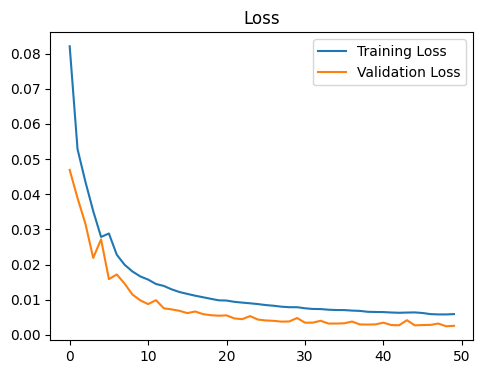

In [12]:
# Define a semente global
np.random.seed(random_state)
tf.random.set_seed(random_state)

epochs = 50

optimizer=keras.optimizers.Adam(learning_rate=0.001)

# Verifica se a pasta "modelo" existe, senão, cria
if not os.path.exists("modelo"):
    os.makedirs("modelo")

# define o check_point path do melhor modelo
checkpoint_filepath = 'modelo/best_model.h5'

# cria um ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # isto garante que o modelo inteiro será salvo
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

# compilando o modelo
modelo.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

# cria um EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# treina o modelo
history = modelo.fit(
    train_generator,
    steps_per_epoch=len(lst_files_treino)//batch_size,
    validation_data=val_generator,
    validation_steps=len(lst_files_val)//batch_size,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint_callback]
)

plot_result(history)

###9 - Execução do melhor modelo no subconjunto de teste

Os resultados obtidos pelo modelo são bastante satisfatórios. O Erro Absoluto Médio (MAE), que registra 0.0356 na validação e 0.0370 no teste, indica que o modelo tem, em média, um pequeno desvio nas suas previsões em relação ao valor real. Considerando que a escala de valores trabalhada é de 0 a 1, esse é um resultado bastante positivo.

O valor do erro quadrático médio (MSE) — que representa a perda do modelo — também é muito baixo, registrando 0.0029 tanto no conjunto de validação quanto no conjunto de teste. O MSE é uma métrica importante pois é especialmente sensível a outliers, já que eleva ao quadrado os resíduos.

Vale ressaltar que a diferença entre as métricas de treino, validação e teste é bastante pequena. Isso sugere que o modelo está generalizando bem e não está ajustando excessivamente (overfitting) aos dados de treino.

Dado o problema em questão e a escala de valores que está sendo trabalhada, os desempenhos observados indicam que o modelo é eficaz e realiza previsões precisas.

In [13]:
# carrega o melhor modelo salvo
melhor_modelo = load_model('modelo/best_model.h5')

# avalia o modelo com o conjunto de testes
test_loss, test_mae = modelo.evaluate(
    test_generator, steps=len(lst_files_teste)//batch_size
)
print(f"MAE no conjunto de teste: {test_mae:.4f}")
print(f"Loss no conjunto de teste: {test_loss:.4f}")

3/3 [==============================] - 2s 693ms/step - loss: 0.0027 - mean_absolute_error: 0.0370
MAE no conjunto de teste: 0.0370
Loss no conjunto de teste: 0.0027
